# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import warnings
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
warnings.filterwarnings("ignore")

# 2. Data Understanding

In [2]:
data = pd.read_csv('Cardiovascular_Disease_Dataset.csv')

In [3]:
data.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [4]:
data = data.set_index('patientid')

In [5]:
data

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
patientid,,,,,,,,,,,,,
103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1


In [6]:
data.shape

(1000, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 103368 to 9990855
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   gender             1000 non-null   int64  
 2   chestpain          1000 non-null   int64  
 3   restingBP          1000 non-null   int64  
 4   serumcholestrol    1000 non-null   int64  
 5   fastingbloodsugar  1000 non-null   int64  
 6   restingrelectro    1000 non-null   int64  
 7   maxheartrate       1000 non-null   int64  
 8   exerciseangia      1000 non-null   int64  
 9   oldpeak            1000 non-null   float64
 10  slope              1000 non-null   int64  
 11  noofmajorvessels   1000 non-null   int64  
 12  target             1000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 109.4 KB


In [8]:
data.describe()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


check if the data is balanced or not


In [9]:
data.target.value_counts()

1    580
0    420
Name: target, dtype: int64

Explore the features

In [10]:
print(data.nunique())

age                   61
gender                 2
chestpain              4
restingBP             95
serumcholestrol      344
fastingbloodsugar      2
restingrelectro        3
maxheartrate         129
exerciseangia          2
oldpeak               63
slope                  4
noofmajorvessels       4
target                 2
dtype: int64


In [11]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"{column}: {unique_values}")

age: [53 40 49 43 31 24 79 52 62 61 59 58 27 32 42 65 35 39 72 71 46 23 20 78
 29 75 25 48 37 66 22 26 51 77 28 54 41 63 73 68 34 38 55 69 21 57 60 74
 44 36 80 70 30 33 76 67 45 64 47 50 56]
gender: [1 0]
chestpain: [2 0 1 3]
restingBP: [171  94 133 138 199 173 130 127 121 190 192 129  98 170 188 137 200 182
 196 177 136 156 191 101 198 157 126  97 186 153 164 189  99 132 159 123
 135 193 124 125 178 139 128 144 161 142 183 140 151 143 111 172 195 150
 141 131 145 147 169 155 180 104 184 100 158 160  95 167 154 197 175 152
 122 163 174 108 146 176 194 187 185 105 166 181 134 168  96 162 102 110
 148 120 149 165 179]
serumcholestrol: [  0 229 142 295 240 345 357 181 529 409 135 209 354 350 247 177 269 253
 397 164 223 349 352 478 521 175 248 404  86 231 241 546 326 381 417 472
 252 296 249 325 389 536 211 199 322 208 138 431 491 244 359 193 264 351
 309 176 410 328 504 561  87 433 257 508 132 316 392 221 481 261 299 236
 336 551 305 502 133 390 467 213 342 368 203 268 286 222 363 146 4

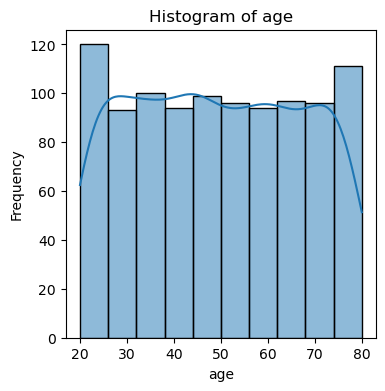

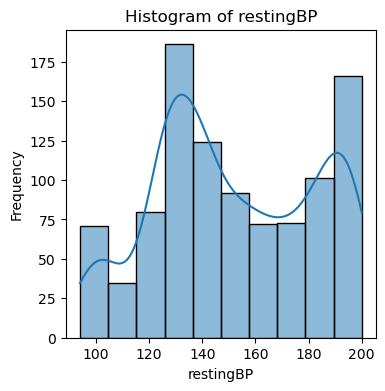

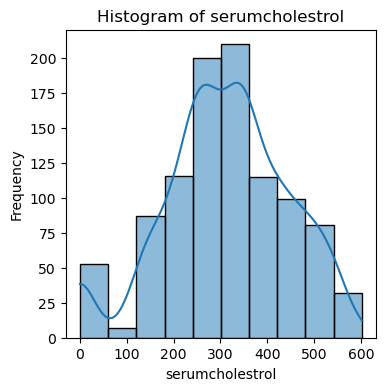

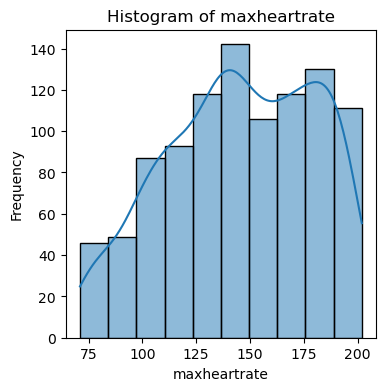

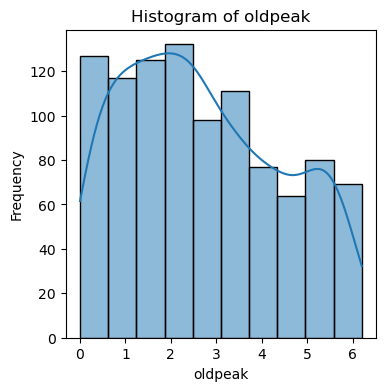

In [12]:
numerical_features=['age','restingBP','serumcholestrol','maxheartrate','oldpeak']
for column in numerical_features:
    
    plt.figure(figsize=(4, 4))
    sns.histplot(data[column], kde=True, bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# 3. Data Cleaning + Preprocessing


## 3.1 Data cleaning

In [13]:
# check if the data contains duplicated rows

data.duplicated().sum()

0

In [14]:
# check if data contains missing values

data.isnull().sum()

age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

## 3.2 Data Splitting

In [15]:
# Split data into train and test sets

X_data = data.iloc[:, :-1]
y_data = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [16]:
Features = X_data.columns

In [17]:
Features

Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'noofmajorvessels'],
      dtype='object')

outliers detection using box plot

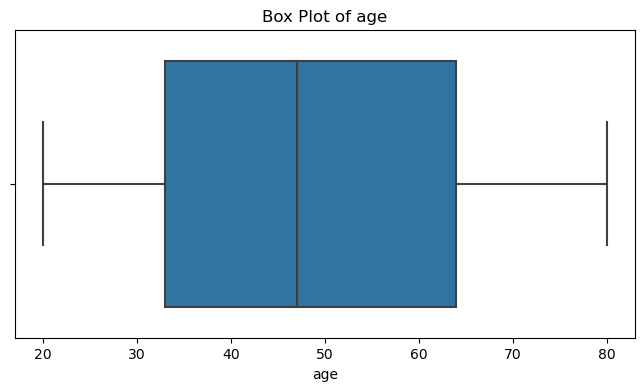

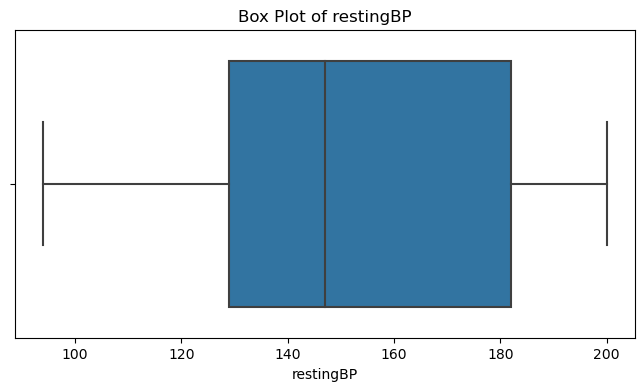

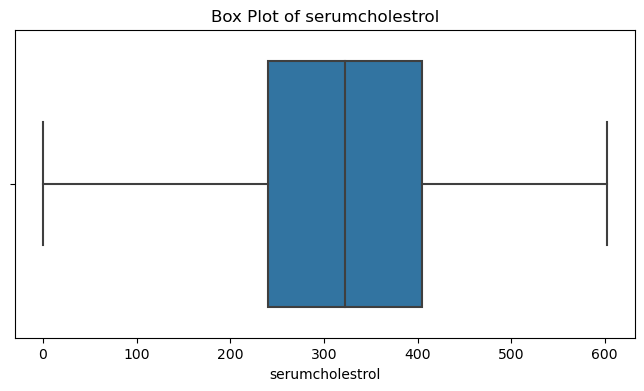

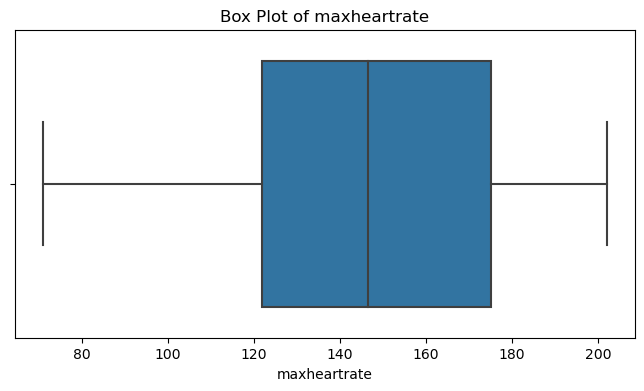

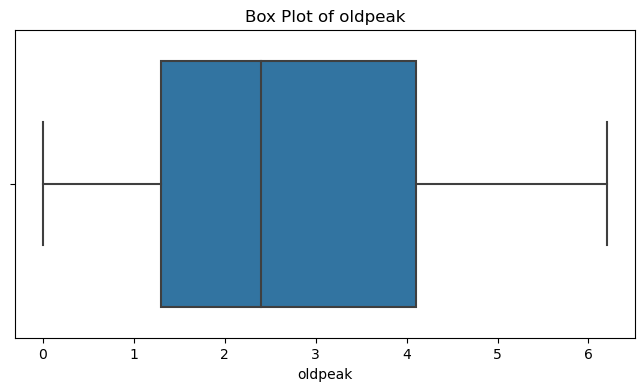

In [18]:
for column in numerical_features:
   
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=X_train[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

outliers detection using z_score

In [19]:
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print(len(outliers))

In [20]:
for col in X_train.columns:
    if col in numerical_features:
        print(f"number of outliers in {col}: ",out_zscore(X_train[col]))

0
number of outliers in age:  None
0
number of outliers in restingBP:  None
0
number of outliers in serumcholestrol:  None
0
number of outliers in maxheartrate:  None
0
number of outliers in oldpeak:  None


skewenes test

In [21]:
skewness = X_train[numerical_features].skew()

In [22]:
skewness

age                0.079131
restingBP          0.006320
serumcholestrol   -0.331250
maxheartrate      -0.236619
oldpeak            0.304673
dtype: float64

## 3.2 Data Transformation

In [23]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# 4. Feature Selection

feature selection using wrapper methods

## 4.1 Backward selection

In [25]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=Features,index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=Features,index=X_test.index)

In [26]:
X_train_scaled_df

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
patientid,,,,,,,,,,,,
422067,0.024295,-1.804250,0.010440,1.320889,1.568667,-0.658553,1.683724,-0.394077,-0.985111,0.110690,0.456131,0.810666
5295100,0.472386,0.554247,-1.033608,-0.738588,0.030591,-0.658553,-0.941966,-0.215019,-0.985111,-0.236345,-1.511011,-0.213872
7127580,0.752443,-1.804250,-1.033608,1.154802,0.000284,1.518481,-0.941966,-0.215019,1.015114,-0.467701,1.439702,0.810666
5604410,0.528397,0.554247,-1.033608,-1.469370,-1.371104,-0.658553,-0.941966,0.739958,1.015114,-1.103932,-0.527440,0.810666
8494876,-0.367785,0.554247,-1.033608,-0.007806,0.257893,-0.658553,1.683724,-0.632821,-0.985111,-0.120667,1.439702,-0.213872
...,...,...,...,...,...,...,...,...,...,...,...,...
1204908,1.200534,0.554247,-1.033608,0.091846,-0.840733,1.518481,0.370879,-1.050624,-0.985111,0.978276,0.456131,1.835203
2700596,0.416375,-1.804250,-1.033608,-0.439632,-0.704352,-0.658553,-0.941966,-0.692507,-0.985111,-1.103932,-1.511011,-1.238410
8667937,-0.255762,-1.804250,2.098537,1.586628,1.144370,-0.658553,0.370879,-1.378897,-0.985111,-0.467701,-0.527440,-0.213872


In [27]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [28]:
backward_elimination(X_train_scaled_df,y_train)

['gender',
 'chestpain',
 'restingBP',
 'fastingbloodsugar',
 'restingrelectro',
 'maxheartrate',
 'oldpeak',
 'slope',
 'noofmajorvessels']

## 4.2 Farward selection

In [29]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [30]:
forward_selection(X_train_scaled_df,y_train)

['slope',
 'chestpain',
 'restingBP',
 'restingrelectro',
 'fastingbloodsugar',
 'noofmajorvessels',
 'oldpeak',
 'gender',
 'maxheartrate']

# 5. Model training + Evaluation

In [31]:
Selected_features = backward_elimination(X_train,y_train)
X_Train=X_train_scaled_df[Selected_features]
X_Test=X_test_scaled_df[Selected_features]

Apply the SVM algorithm

In [32]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 2, 6))
}
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Train the classifier
grid_search.fit(X_Train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1.0, 10.0,
                                   100.0],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=2)

In [33]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [34]:
# Train the classifier with the best parameters
best_svm_classifier = grid_search.best_estimator_

In [35]:
y_pred = best_svm_classifier.predict(X_Test)

In [36]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 82   1]
 [  4 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        83
           1       0.99      0.97      0.98       117

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200


Accuracy Score:
0.975


In [37]:
print("\nClassification Report:")
print(classification_report(y_train, best_svm_classifier.predict(X_Train)))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       337
           1       0.99      1.00      0.99       463

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



Apply the KNN classifier

In [38]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize GridSearchCV for KNN
knn_grid_search = GridSearchCV(estimator=knn_classifier, param_grid=knn_param_grid, cv=5, n_jobs=-1, verbose=2)

# Train the KNN classifier
knn_grid_search.fit(X_train, y_train)

# Get the best parameters found for KNN
best_knn_params = knn_grid_search.best_params_
print("Best parameters found for KNN: ", best_knn_params)

# Get the best KNN classifier model
best_knn_classifier = knn_grid_search.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters found for KNN:  {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}


In [39]:
y_pred_knn = best_knn_classifier.predict(X_test)

In [40]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_knn ))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_knn))

Confusion Matrix:
[[ 68  15]
 [ 17 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        83
           1       0.87      0.85      0.86       117

    accuracy                           0.84       200
   macro avg       0.83      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200


Accuracy Score:
0.84
